# Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(0)

In [3]:
df = pd.read_parquet("../data/df.parquet")

In [4]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

# Fitting the model

In [5]:
from sklearn.model_selection import KFold
linear_regressor = LinearRegression()
scores = []
kfold = KFold(n_splits=10)

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    linear_regressor.fit(X_train, y_train)
    scores.append(linear_regressor.score(X_test, y_test))

print("Mean score:", np.mean(scores))


Mean score: 0.9699296987042108


# Graphs for bootstrapping samples

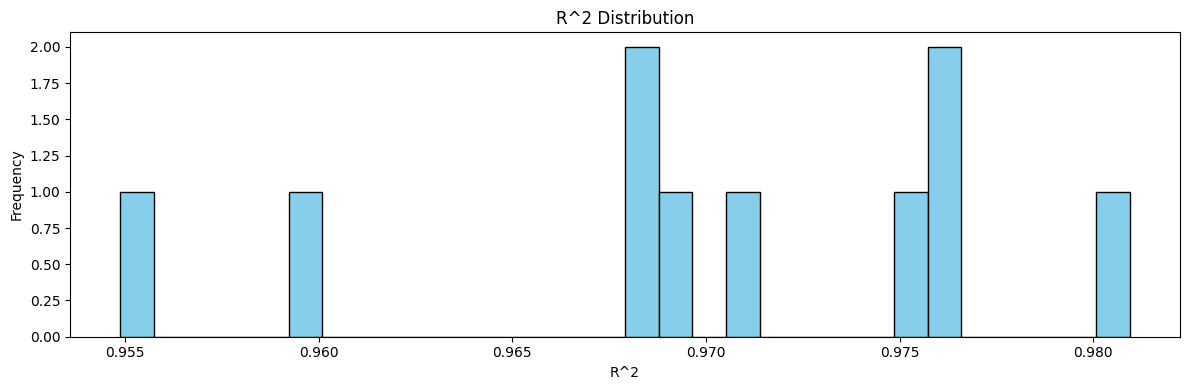

In [6]:
# Plot histograms of bootstrapped metrics
plt.figure(figsize=(12, 4))

plt.hist(scores, bins=30, color='skyblue', edgecolor='black')
plt.title('R^2 Distribution')
plt.xlabel('R^2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
y_pred=linear_regressor.predict(X_test)

# Graphs (Expected Value vs Actual Data)

In [8]:
import matplotlib.pyplot as plt

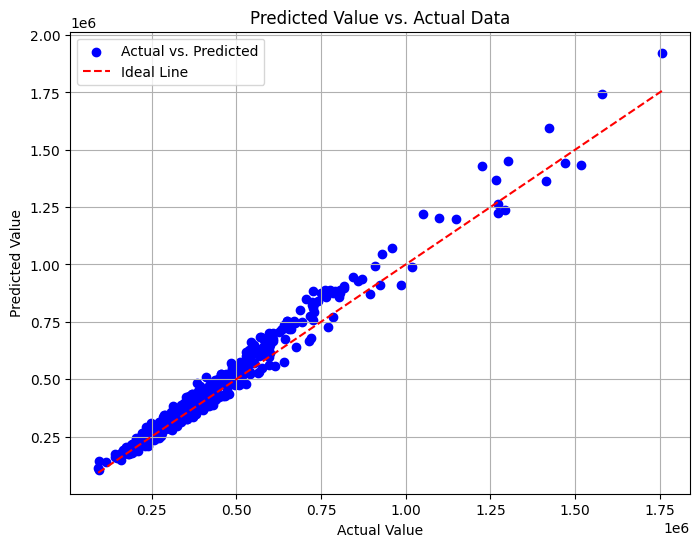

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Predicted Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

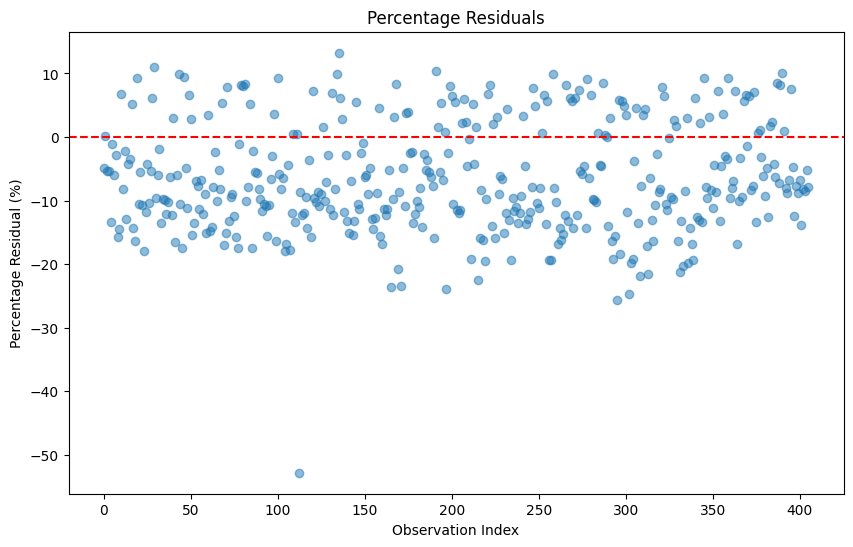

In [10]:
# Calculate percentage residuals: (Actual - Predicted) / Actual * 100
percentage_residuals = ((y_test - y_pred) / y_test) * 100

# Plotting percentage residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(percentage_residuals)), percentage_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Percentage Residual (%)')
plt.show()

# Saving best model

In [11]:
import pickle

pickle.dump(linear_regressor, open("../linear_model.pickle", "wb"))